# Monte Carlo sampling

Author: Dimitris G. Giovanis,  
Date: June 20, 2018  
Last Modified: Dimitris G. Giovanis
Date: May 5, 2020  
UQpy Version 3.0

In this example, a Monte Carlo sampling is employed to generate samples utilizing the UQpy MCS class. 

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the MCS class from UQpy.

In [1]:
from UQpy.SampleMethods import MCS
import numpy as np
import matplotlib.pyplot as plt
import time

In [17]:
from UQpy.Distributions import Normal, DistributionContinuous1D
dist1 = Normal(loc=0., scale=1.)
dist2 = Normal(loc=0., scale=1.)
x = MCS(dist_object=[dist1,dist2], nsamples=5, random_state=[1,3],  verbose=True)
print(x.samples)
print(len(x.samples[0]))

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.
[array([[1.62434536],
       [1.78862847]]), array([[-0.61175641],
       [ 0.43650985]]), array([[-0.52817175],
       [ 0.09649747]]), array([[-1.07296862],
       [-1.8634927 ]]), array([[ 0.86540763],
       [-0.2773882 ]])]
2


In [5]:
print(x)
x.run(nsamples=2)
print(x.samples)

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.
[array([[1.62434536],
       [0.05056171]]), array([[-0.61175641],
       [ 0.49995133]]), array([[-0.52817175],
       [-0.99590893]]), array([[-1.07296862],
       [ 0.69359851]]), array([[ 0.86540763],
       [-0.41830152]]), array([[-1.0856306 ],
       [ 0.21326612]]), array([[ 0.99734545],
       [-0.09189941]]), array([[1.62434536],
       [0.05056171]]), array([[-0.61175641],
       [ 0.49995133]]), array([[1.62434536],
       [0.05056171]]), array([[-0.61175641],
       [ 0.49995133]])]


In [6]:
x.transform_u01()
print(x.samplesU01)

[array([[0.94784894],
       [0.52016261]]), array([[0.27034947],
       [0.69144533]]), array([[0.29869007],
       [0.1596472 ]]), array([[0.1416426 ],
       [0.75603299]]), array([[0.80659245],
       [0.33786334]]), array([[0.13882123],
       [0.5844403 ]]), array([[0.84070157],
       [0.46338898]]), array([[0.94784894],
       [0.52016261]]), array([[0.27034947],
       [0.69144533]]), array([[0.94784894],
       [0.52016261]]), array([[0.27034947],
       [0.69144533]])]


In [9]:
from UQpy.Distributions import MVNormal
dist = MVNormal(mean=[1., 2.], cov=[[4., -0.9], [-0.9, 1.]])

x1 = MCS(dist_object=dist, nsamples=5, random_state=123, verbose=True)
print(x1.samples)

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.
[array([[3.38736185, 2.23541269]]), array([[0.08946208, 0.8979547 ]]), array([[2.53138343, 3.06057229]]), array([[5.72159837, 0.30657467]]), array([[-1.71534735,  1.97285583]])]


In [13]:
x2 = MCS(dist_object=[dist1, dist], nsamples=5, random_state=[123,None],  verbose=True)
print(np.array(x2.samples))

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.
[[array([-1.0856306]) array([2.71076423, 0.1045249 ])]
 [array([0.99734545]) array([-0.83581846,  2.72645573])]
 [array([0.2829785]) array([2.00888019, 1.19372116])]
 [array([-1.50629471]) array([-2.92088426,  3.20510339])]
 [array([-0.57860025]) array([2.68866374, 3.02856845])]]


In [19]:
samples = np.zeros(shape=(5, 2))
for i in range(5):
    samples[i, :] = x2.samples[i][1]
print(samples)

[[ 2.71076423  0.1045249 ]
 [-0.83581846  2.72645573]
 [ 2.00888019  1.19372116]
 [-2.92088426  3.20510339]
 [ 2.68866374  3.02856845]]


TypeError: list indices must be integers or slices, not tuple

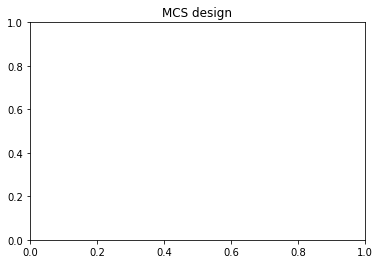

In [7]:
fig, ax = plt.subplots()
plt.title('MCS design')
plt.scatter(x2.samples[0], x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1')
plt.hist(x.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2')
plt.hist(x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

When the sample method is called, the new samples are automatically appended to the existing samples.

In [ ]:
from UQpy.Distributions import MVNormal
dist = MVNormal(mean=[1., 2.], cov=[[4., -0.9], [-0.9, 1.]])

x1 = MCS(dist_object=[dist], nsamples=5, random_state=123, verbose=True)
print(x1.samples)

In [ ]:
print(np.shape(x.samples))
fig, ax = plt.subplots()
plt.title('MCS design')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1], marker='o')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [ ]:
x2 = MCS(dist_object=[dist1, dist], nsamples=5, random_state=123,  verbose=True)
#print(x2.samples)
print(np.array(x2.temp))

In [ ]:
from UQpy.Distributions import Binomial
dist3 = Binomial(n=5, p=0.4)
x3 = MCS(dist_object=[dist1, dist3], nsamples=5, verbose=True)

In [ ]:
print(np.shape(x.samples))
fig, ax = plt.subplots()
plt.title('MCS design')
plt.scatter(x3.samples[:, 0], x3.samples[:, 1], marker='o')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [ ]:
x3.run(nsamples=100)

In [ ]:
print(x3.samples.shape[0])